In [ ]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout 

from tensorflow.keras.optimizers import SGD

In [12]:
df = pd.read_csv('MBA.csv')

df['admission'] = df['admission'].fillna(-1)
df['admission'] = df['admission'].replace("Admit",1)
df['admission'] = df['admission'].replace("Waitlist",0)

df = pd.get_dummies(df, columns=['gender', 'work_industry', 'major', 'race'], drop_first=False)


y = df.admission.values
X=df.drop(['admission'], axis='columns').values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.50, random_state=1)


scaler = StandardScaler()

scaler.fit(X_train)

# standarize the test and training inputs 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Single Layer Neural Network

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.5650 - val_accuracy: 0.8402 - val_loss: 0.4091
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8389 - loss: 0.4040 - val_accuracy: 0.8418 - val_loss: 0.4007
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3724 - val_accuracy: 0.8369 - val_loss: 0.4000
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8353 - loss: 0.3743 - val_accuracy: 0.8421 - val_loss: 0.3991
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.3660 - val_accuracy: 0.8373 - val_loss: 0.4017
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8375 - loss: 0.3742 - val_accuracy: 0.8421 - val_loss: 0.4028
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8613 - loss: 0.3484 - val_accuracy: 0.8273 - val_loss: 0.4119
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8600 - loss: 0.3592 - val_accuracy: 0.8308 -

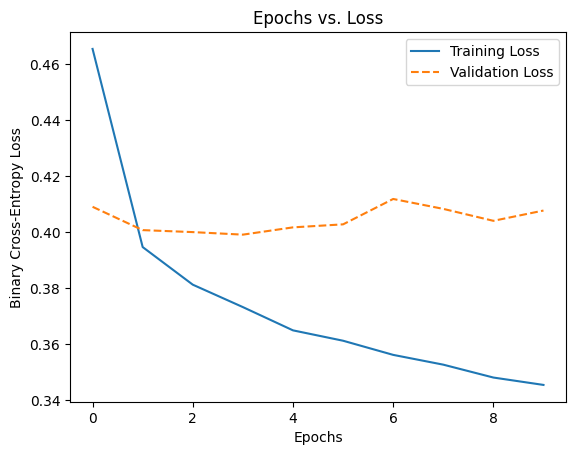

In [ ]:
y_train_mapped = np.where(y_train == -1, 0, np.where(y_train == 0, 1, 2))
y_test_mapped = np.where(y_test == -1, 0, np.where(y_test == 0, 1, 2))

# Define the model with a single softmax output layer for multiclass classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(3, activation='softmax')  # 3 neurons for 3 classes
])

model.compile(optimizer=SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_mapped, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test_mapped))

y_pred_prob = model.predict(X_test)

y_pred_class = np.argmax(y_pred_prob, axis=1)

# Map the predicted classes back to the original labels [-1, 0, 1]
y_pred = np.where(y_pred_class == 0, -1, np.where(y_pred_class == 1, 0, 1))
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Epochs vs. Loss')
plt.legend()
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted'
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print('F1: ', f1)



Accuracy:  0.8337100419761059
Precision:  0.44168408640188667
Recall:  0.4238657536737673
F1:  0.43014237453098425


## Multi-Layer Perceptron

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.6407 - val_accuracy: 0.8424 - val_loss: 0.4614
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8407 - loss: 0.4663 - val_accuracy: 0.8428 - val_loss: 0.4286
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8247 - loss: 0.4722 - val_accuracy: 0.8424 - val_loss: 0.4079
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8252 - loss: 0.4532 - val_accuracy: 0.8424 - val_loss: 0.4013
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.8315 - loss: 0.4385 - val_accuracy: 0.8428 - val_loss: 0.4020
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8338 - loss: 0.4049 - val_accuracy: 0.8424 - val_loss: 0.4001
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8449 - loss: 0.3861 - val_accuracy: 0.8428 - val_loss: 0.3994
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8459 - loss: 0.4011 - val_accuracy: 0.84

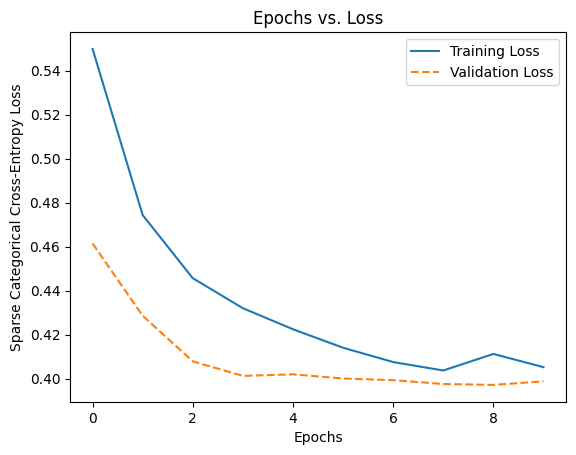

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
Accuracy:  0.8427510494026478
Precision:  0.4663812128190366
Recall:  0.3366361643773139
F1:  0.31231264560347366


In [39]:
y_train_mapped = np.where(y_train == -1, 0, np.where(y_train == 0, 1, 2))
y_test_mapped = np.where(y_test == -1, 0, np.where(y_test == 0, 1, 2))

# Define the model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), # added dropout to reduce overfitting 
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes, softmax activation
])

mlp_model.compile(optimizer=SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = mlp_model.fit(X_train, y_train_mapped, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test_mapped))

plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Sparse Categorical Cross-Entropy Loss')
plt.title('Epochs vs. Loss')
plt.legend()
plt.show()

y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)  # Get the class with the highest probability

accuracy = accuracy_score(y_test_mapped, y_pred_mlp)
precision = precision_score(y_test_mapped, y_pred_mlp, average='macro') 
recall = recall_score(y_test_mapped, y_pred_mlp, average='macro')
f1 = f1_score(y_test_mapped, y_pred_mlp, average='macro')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print('F1: ', f1)
